In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter
from glob import glob
# https://gtexportal.org/home/downloads/adult-gtex/single_cell

In [3]:
adata = sc.read_h5ad('/home/vlada/ssi/results/GTEx_8_tissues_snRNAseq_atlas_071421.public_obs.h5ad')
adata

AnnData object with n_obs × n_vars = 209126 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', 'Strand', 'gene_name', 'gene_source', 'gene_biotype', 'gene_length', 'gene_coding_length', 'Approved symbol', '

In [6]:
# GTEX-1R9PN-5002
subset = adata[adata.obs['Sample ID short'] == 'GTEX-1R9PN-5002'].copy()
subset.write_h5ad('GTEX-1R9PN-5002.h5ad', compression='gzip')

In [8]:
sample = 'GTEX-1HSMQ-5005'
subset = adata[adata.obs['Sample ID short'] == sample].copy()
subset.write_h5ad(sample + '.h5ad', compression='gzip')

In [9]:
len(subset)

14404

In [34]:
# Separate samples to different files so we can run them with CoDi
for sample in ['GTEX-1R9PN-5002']: 
    subset = adata[adata.obs['Sample ID short'] == sample].copy()
    subset.write_h5ad(sample + '.h5ad', compression='gzip')


In [ ]:
# python CoDi.py --st_path notebooks/GTEX-1HSMQ-5011.h5ad  --sc_path notebooks/GTEX-1HSMQ-5011.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-15RIE-5021.h5ad  --sc_path notebooks/GTEX-1HSMQ-5011.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-145ME-5018.h5ad  --sc_path notebooks/GTEX-1HSMQ-5011.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0

# python CoDi.py --st_path notebooks/GTEX-1R9PN-5002.h5ad --sc_path notebooks/GTEX-1R9PN-5002.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-1CAMS-5015.h5ad --sc_path notebooks/GTEX-1R9PN-5002.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-1MCC2-5013.h5ad --sc_path notebooks/GTEX-1R9PN-5002.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0

# python CoDi.py --st_path notebooks/GTEX-16BQI-5013.h5ad --sc_path notebooks/GTEX-16BQI-5013.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-15SB6-5008.h5ad --sc_path notebooks/GTEX-16BQI-5013.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-145ME-5005.h5ad --sc_path notebooks/GTEX-16BQI-5013.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# # esophagusmuscularis:
# python CoDi.py --st_path notebooks/GTEX-1ICG6-5014.h5ad --sc_path notebooks/GTEX-1ICG6-5014.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-144GM-5010.h5ad --sc_path notebooks/GTEX-1ICG6-5014.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-1HSMQ-5021.h5ad --sc_path notebooks/GTEX-1ICG6-5014.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0

# # heart
# python CoDi.py --st_path notebooks/GTEX-1ICG6-5003.h5ad --sc_path notebooks/GTEX-1ICG6-5003.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-13N11-5002.h5ad --sc_path notebooks/GTEX-1ICG6-5003.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-15RIE-5015.h5ad --sc_path notebooks/GTEX-1ICG6-5003.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# #
# # lung
# python CoDi.py --st_path notebooks/GTEX-1HSMQ-5005.h5ad --sc_path notebooks/GTEX-1HSMQ-5005.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-15CHR-5005.h5ad --sc_path notebooks/GTEX-1HSMQ-5005.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-13N11-5030.h5ad --sc_path notebooks/GTEX-1HSMQ-5005.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0

# # prostate
# python CoDi.py --st_path notebooks/GTEX-1HSMQ-5014.h5ad --sc_path notebooks/GTEX-1HSMQ-5014.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-15CHR-5014.h5ad --sc_path notebooks/GTEX-1HSMQ-5014.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-1I1GU-5006.h5ad --sc_path notebooks/GTEX-1HSMQ-5014.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-12BJ1-5007.h5ad --sc_path notebooks/GTEX-1HSMQ-5014.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0

# # skin
# python CoDi.py --st_path notebooks/GTEX-1HSMQ-5007.h5ad --sc_path notebooks/GTEX-1HSMQ-5007.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-1CAMR-5015.h5ad --sc_path notebooks/GTEX-1HSMQ-5007.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0
# python CoDi.py --st_path notebooks/GTEX-15EOM-5003.h5ad --sc_path notebooks/GTEX-1HSMQ-5007.h5ad -a "Cell types level 2" --contrastive --num_markers 300 --augmentation_perc 0

In [ ]:
for sample in adata.obs['Sample ID short'].unique():
    sample_df = adata.obs[adata.obs['Sample ID short'] == sample]
    display(sample, sample_df['tissue'].unique())
    display(Counter(sample_df['Cell types level 2']))
    print('-------------------')

In [28]:
adata.obs['Sample ID short'].unique()

['GTEX-1HSMQ-5011', 'GTEX-15RIE-5021', 'GTEX-145ME-5018', 'GTEX-1R9PN-5002', 'GTEX-1CAMS-5015', ..., 'GTEX-1I1GU-5006', 'GTEX-12BJ1-5007', 'GTEX-1HSMQ-5007', 'GTEX-1CAMR-5015', 'GTEX-15EOM-5003']
Length: 25
Categories (25, object): ['GTEX-1HSMQ-5011', 'GTEX-15RIE-5021', 'GTEX-145ME-5018', 'GTEX-1R9PN-5002', ..., 'GTEX-12BJ1-5007', 'GTEX-1HSMQ-5007', 'GTEX-1CAMR-5015', 'GTEX-15EOM-5003']

In [ ]:
files = sorted(glob('../results/*CoDi_KLD.h5ad'))
acc_dict = {'CoDi': [], 'CoDi_dist': [], 'CoDi_contrastive': []}
for f in files:
    ad = sc.read_h5ad(f)
    for k, v in acc_dict.items():
        acc_dict[k].append(accuracy_score(ad.obs.loc[:, 'Cell types level 2'], ad.obs.loc[:, k]))
display(acc_dict)

In [60]:
performance_dict = acc_dict.copy()
performance_dict['sample'] = [f.replace('../results/', '').replace('_CoDi_KLD.h5ad', '').strip() for f in files]
performance_dict['tissue'] = [adata.obs[adata.obs['Sample ID short'] == s]['tissue'].unique()[0] for s in performance_dict['sample']]

In [63]:
ref_samples = ['GTEX-1HSMQ-5011', 'GTEX-1R9PN-5002', 'GTEX-16BQI-5013', 'GTEX-1ICG6-5014', 'GTEX-1ICG6-5003', 'GTEX-1HSMQ-5005', 'GTEX-1HSMQ-5014', 'GTEX-1HSMQ-5007']

In [117]:
df = pd.DataFrame(performance_dict).sort_values(by='tissue')
df = df[df['tissue'] != 'skin']
df.set_index('sample', inplace=True)
df.columns = ['CoDi', 'CoDi distance', 'CoDi contrastive', 'Tissue']

In [118]:
df_no_ref = df[~df.index.isin(ref_samples)]
df.loc['Mean', :] = list(df_no_ref.mean().values) + ['all without *']
df.loc['Std', :] = list(df_no_ref.std().values) + ['all without *']
df.loc['Min', :] = list(df_no_ref.min().values)[:3] + ['all without *']
df.loc['Max', :] = list(df_no_ref.max().values)[:3] + ['all without *']
df.index = ['*' + x if x in ref_samples else x for x in df.index]
df = df.applymap(lambda x: x if isinstance(x, str) else np.round(100*x, 2))
df


,CoDi,CoDi distance,CoDi contrastive,Tissue
*GTEX-1R9PN-5002,99.37,98.96,99.63,breast
GTEX-1CAMS-5015,97.89,93.16,97.93,breast
GTEX-1MCC2-5013,98.42,93.61,98.56,breast
GTEX-15SB6-5008,97.75,92.23,98.42,esophagusmucosa
*GTEX-16BQI-5013,98.74,97.64,99.13,esophagusmucosa
GTEX-145ME-5005,96.17,93.07,96.46,esophagusmucosa
*GTEX-1ICG6-5014,98.66,98.15,99.34,esophagusmuscularis
GTEX-144GM-5010,97.15,93.07,97.60,esophagusmuscularis
GTEX-1HSMQ-5021,95.73,92.72,96.35,esophagusmuscularis
GTEX-13N11-5002,96.74,91.58,97.68,heart


In [119]:
df.to_csv('CoDi_atlas.csv')

In [ ]:
# adata2.obsm['spatial'] = adata2.obsm['X_spatial']
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
# my_colors = sns.color_palette(adata2.uns['author_cell_type_colors'])
plot_spatial(adata2, annotation='Cell types level 2', spot_size=18, palette=my_colors, ax=axs[0])
plot_spatial(adata2, annotation='CoDi', spot_size=18, palette=my_colors, ax=axs[1])

Text(0.5, 1.0, 'Contingency Matrix')

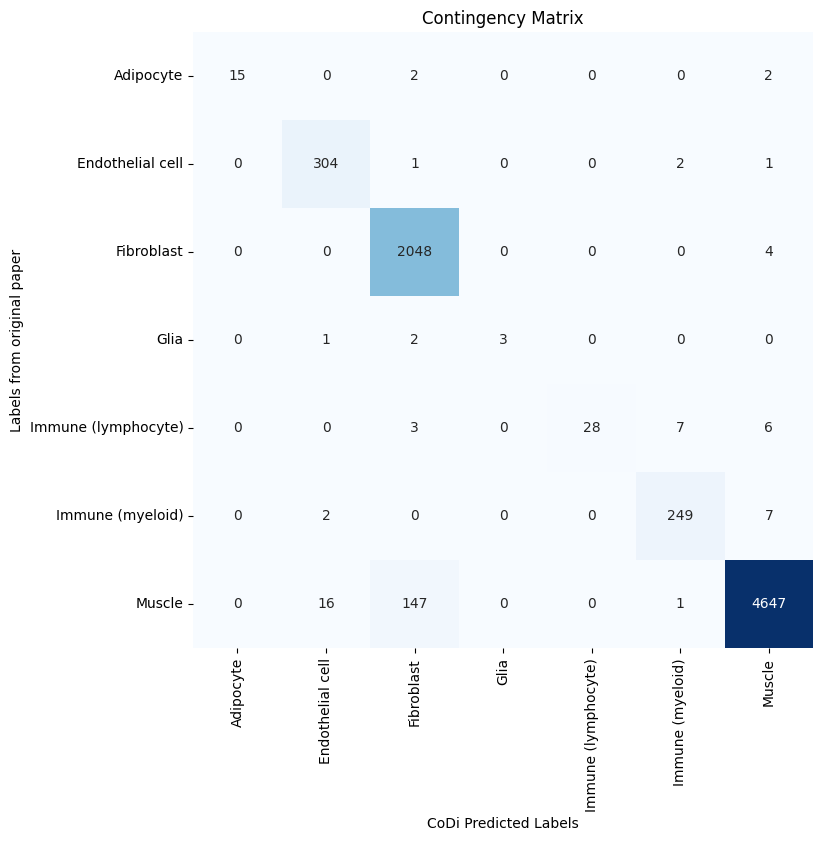

In [32]:
# out_name = st_path.split('/')[-1].replace('.h5ad', '_codi_contingency.png')
cm = contingency_matrix(adata2.obs.loc[:, 'Cell types level 2'], adata2.obs.loc[:, 'CoDi'])
# Visualize the confusion matrix using Seaborn
class_labels_y = np.unique(adata2.obs.loc[:, 'Cell types level 2'])
class_labels_x = np.unique(adata2.obs.loc[:, 'CoDi'])

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels_x, yticklabels=class_labels_y)
plt.xlabel("CoDi Predicted Labels")
plt.ylabel("Labels from original paper")
plt.title("Contingency Matrix")
# plt.savefig(out_name, dpi=150, bbox_inches='tight')

In [33]:
accuracy_score(adata2.obs.loc[:, 'Cell types level 2'], adata2.obs.loc[:, 'CoDi'])

0.9727927447319286

In [18]:
adata2

AnnData object with n_obs × n_vars = 35896 × 21073
    obs: 'assay_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sample', 'tissue_ontology_term_id', 'disease_state', 'sex_ontology_term_id', 'genotype', 'development_stage_ontology_term_id', 'author_cell_type', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'CoDi_dist', 'confidence_dist', 'CoDi_contrastive', 'confidence_contrastive', 'CoDi', 'confidence'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'schema_version', 'title'
    obsm: 'X_spatial', 'probabilities', 'probabilities_contrastive', 'probabilities_dist', 'spatial'

In [9]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation
def plot_spatial(
    adata, annotation, ax: Axes, spot_size: float, palette=None, title: str = ""
):
    """
    Scatter plot in spatial coordinates.

    Parameters:
        - adata (AnnData): Annotated data object which represents the sample
        - annotation (str): adata.obs column used for grouping
        - ax (Axes): Axes object used for plotting
        - spot_size (int): Size of the dot that represents a cell. We are passing it as a diameter of the spot, while
                the plotting library uses radius therefore it is multiplied by 0.5
        - palette (dict): Dictionary that represents a mapping between annotation categories and colors
        - title (str): Title of the figure

    """
    s = spot_size * 0.5
    data = adata
    ax = sns.scatterplot(
        data=data.obs,
        hue=annotation,
        x=data.obsm["spatial"][:, 0],
        y=data.obsm["spatial"][:, 1],
        ax=ax,
        s=s,
        linewidth=0,
        palette=palette,
        marker=".",
    )
    ax.invert_yaxis()
    ax.set(yticklabels=[], xticklabels=[], title=title)
    ax.tick_params(bottom=False, left=False)
    ax.set_aspect("equal")
    sns.despine(bottom=True, left=True, ax=ax)